<a href="https://colab.research.google.com/github/FrancescoMonaco/MultiDimMotifDiscovery/blob/main/Thesis_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional Motif Discovery - Extra Files
The file offers cells to replicate each figure or table found in the thesis.

In [1]:
%%capture
#@title Basics, imports
!pip install numpy scikit-learn datasketch scipy
!pip install stumpy NearPy
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

#Thesis Plots

<ipython-input-17-5e191928b933>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


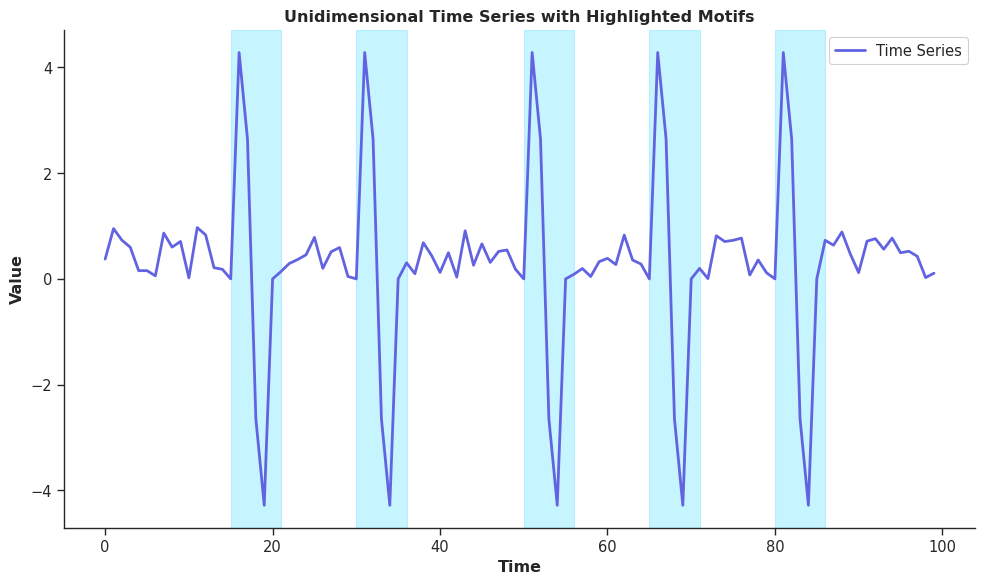

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a minimal style
plt.style.use('seaborn-whitegrid')
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.2)

# Create sample timeseries
np.random.seed(42)  # for reproducibility
timeseries = np.random.rand(100)
timeseries = timeseries.astype(float)

# Plant motifs at specific locations
motif_length = 6
motif = 4.5 * np.sin(np.linspace(0, 2 * np.pi, motif_length))

# Plant the motif at specific locations
motif_locations = [15, 30, 50, 65, 80]

for loc in motif_locations:
    timeseries[loc:loc+motif_length] = motif

m = 6  # This is unused in the current code, but kept for consistency

# Plot the entire timeseries with planted motifs highlighted
plt.figure(figsize=(10, 6))
plt.plot(timeseries, color='#6263e0', label="Time Series", linewidth=2)

# Highlight planted motifs using rectangles
for motif_idx in motif_locations:
     plt.axvspan(motif_idx, motif_idx + motif_length, color='#43dcff', alpha=0.3)

plt.title("Unidimensional Time Series with Highlighted Motifs", fontweight='bold')
plt.xlabel("Time", fontweight='bold')
plt.ylabel("Value", fontweight='bold')

# Remove top and right spines
sns.despine()

# Add legend
plt.legend(loc='upper right', frameon=True, framealpha=0.9)

plt.tight_layout()
plt.show()


<ipython-input-18-4029e263906c>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


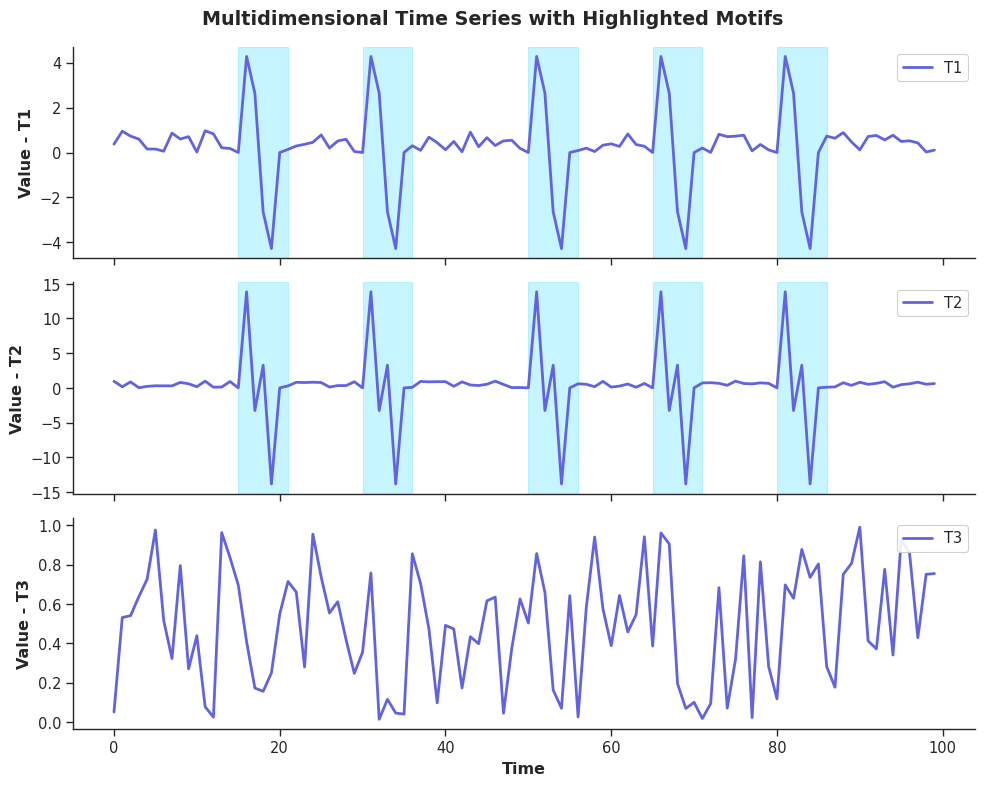

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a minimal style
plt.style.use('seaborn-whitegrid')
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.2)

# Create sample 3-dimensional timeseries
np.random.seed(42)  # for reproducibility
timeseries_3d = np.random.rand(100, 3)
timeseries_3d[:, 0] = timeseries  # One dimension is the same as the unidimensional time series

# Plant motifs at specific locations in the second dimension
motif_length = 6
motif = 4.5 * np.tan(np.linspace(0, 2 * np.pi, motif_length))

# Plant the motif at specific locations in the second dimension
motif_locations = [15, 30, 50, 65, 80]

for loc in motif_locations:
    timeseries_3d[loc:loc+motif_length, 1] = motif

# The third dimension is just noise
timeseries_3d[:, 2] = np.random.rand(100)

m = 6
df = pd.DataFrame(timeseries_3d, columns=['T1', 'T2', 'T3'])

# Plot 3 subplots, one for each dimension, and highlight motifs with rectangles
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

for i, dimension in enumerate(['T1', 'T2', 'T3']):
    axs[i].plot(df[dimension], color='#6263e0', linewidth=2, label=dimension)

    # Highlight motifs using rectangles
    if i < 2:  # Only for the first two dimensions
        for motif_idx in motif_locations:
            axs[i].axvspan(motif_idx, motif_idx + motif_length, color='#43dcff', alpha=0.3)

    axs[i].set_ylabel(f"Value - {dimension}", fontweight='bold')
    axs[i].legend(loc='upper right', frameon=True, framealpha=0.9)
    sns.despine(ax=axs[i])

axs[2].set_xlabel("Time", fontweight='bold')

plt.suptitle("Multidimensional Time Series with Highlighted Motifs", fontweight='bold')
plt.tight_layout()
plt.show()

# SAX images

In [19]:
!pip install pyts
from pyts.approximation import PiecewiseAggregateApproximation
from pyts.approximation import SymbolicAggregateApproximation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.0 MB/s eta 0:00:00


<ipython-input-23-ed691b9f6df5>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


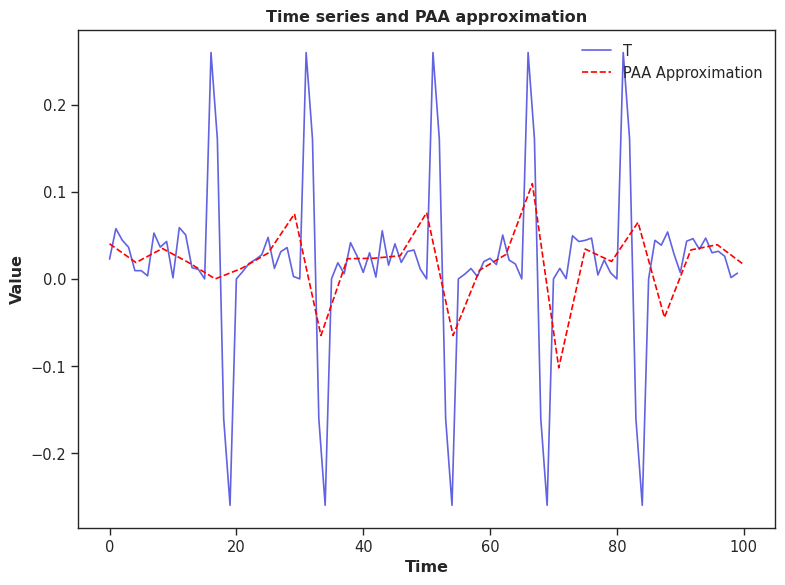

In [23]:
paa = PiecewiseAggregateApproximation(window_size=4)
timeseries = timeseries/np.linalg.norm(timeseries) + 1e-16
t_in = timeseries.reshape(1,-1)
X_paa = paa.transform(t_in)

n_points = len(timeseries)
window_size = 5
new_x = np.linspace(0, n_points, 25)

plt.style.use('seaborn-whitegrid')
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.2)
# Plot original time series
plt.figure(figsize=(8, 6))
sns.lineplot(data=timeseries, label="T", color='#6263e0')

# Plot PAA approximation dashed
plt.plot(new_x, X_paa.flatten(), 'r--', label="PAA Approximation")

plt.title("Time series and PAA approximation", fontweight='bold')
plt.xlabel("Time", fontweight='bold')
plt.ylabel("Value", fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

In [25]:
sax = SymbolicAggregateApproximation(n_bins=7)
X_sax = sax.fit_transform(X_paa)

<ipython-input-26-c322dd0c5f66>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


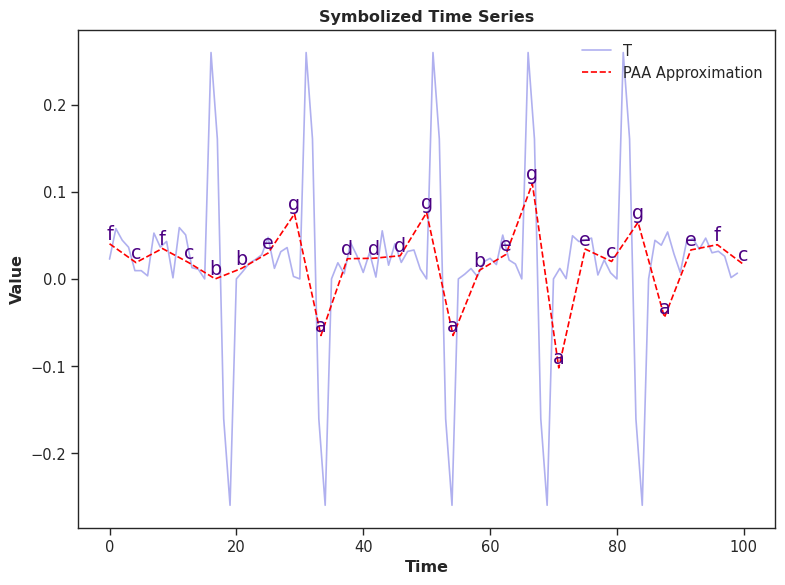

In [26]:
plt.style.use('seaborn-whitegrid')
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.lineplot(data=timeseries, label="T", color='#6263e0', alpha=0.5 )


# Plot PAA approximation dashed
plt.plot(new_x, X_paa.flatten(), 'r--', label="PAA Approximation")
for i, (x, sax_value,y) in enumerate(zip(new_x, X_sax.flatten(), X_paa.flatten())):
    plt.text(x, y, sax_value, ha='center', va='bottom', color='indigo', fontsize='large')

plt.title("Symbolized Time Series", fontweight='bold')
plt.xlabel("Time", fontweight='bold')
plt.ylabel("Value", fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

# Random Selection image

TypeError: quiver() takes from 2 to 5 positional arguments but 6 were given

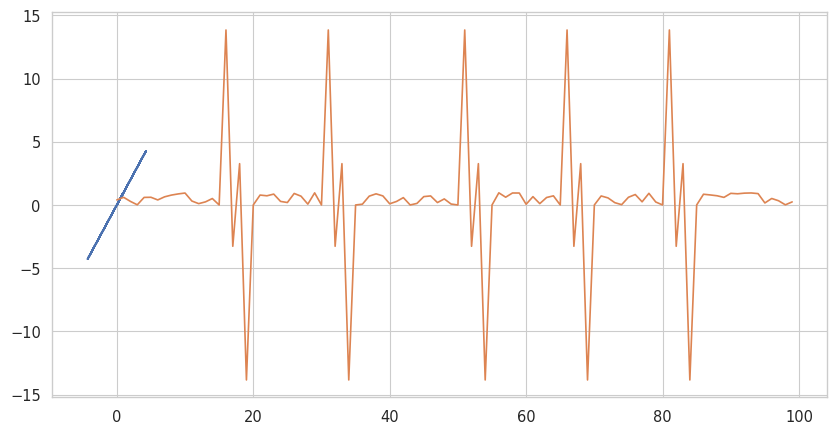

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid", context="paper", font_scale=1.2)

# Create sample 3-dimensional timeseries
timeseries_3d = np.random.rand(100, 3)
timeseries_3d[:, 0] = timeseries  # One dimension is the same as the unidimensional time series

# Plant motifs at specific locations in the second dimension
motif_length = 6
motif = 4.5 * np.tan(np.linspace(0, 2 * np.pi, motif_length))

# Plant the motif at specific locations in the second dimension
motif_locations = [15, 30, 50, 65, 80]

for loc in motif_locations:
    timeseries_3d[loc:loc+motif_length, 1] = motif

# The third dimension is just noise
timeseries_3d[:, 2] = np.random.rand(100)
df = pd.DataFrame(timeseries_3d, columns=['T1', 'T2', 'T3'])

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(df['T1'], df['T1'], df['T2'])

# Add an arrow pointing to the right
arrow_start = (df['T2'].iloc[0], df['T1'].iloc[0], df['T2'].iloc[0])
arrow_direction = (1, 0, 0)  # Pointing to the right
ax.quiver(*arrow_start, *arrow_direction, color='r')

# Plot an array or another plot next to the 3D plot
# For example, let's plot a heatmap of a 2D array
data = np.random.rand(10, 10)
ax2 = fig.add_subplot(122)
sns.heatmap(data, ax=ax2)
ax2.set_title('Array')

plt.show()

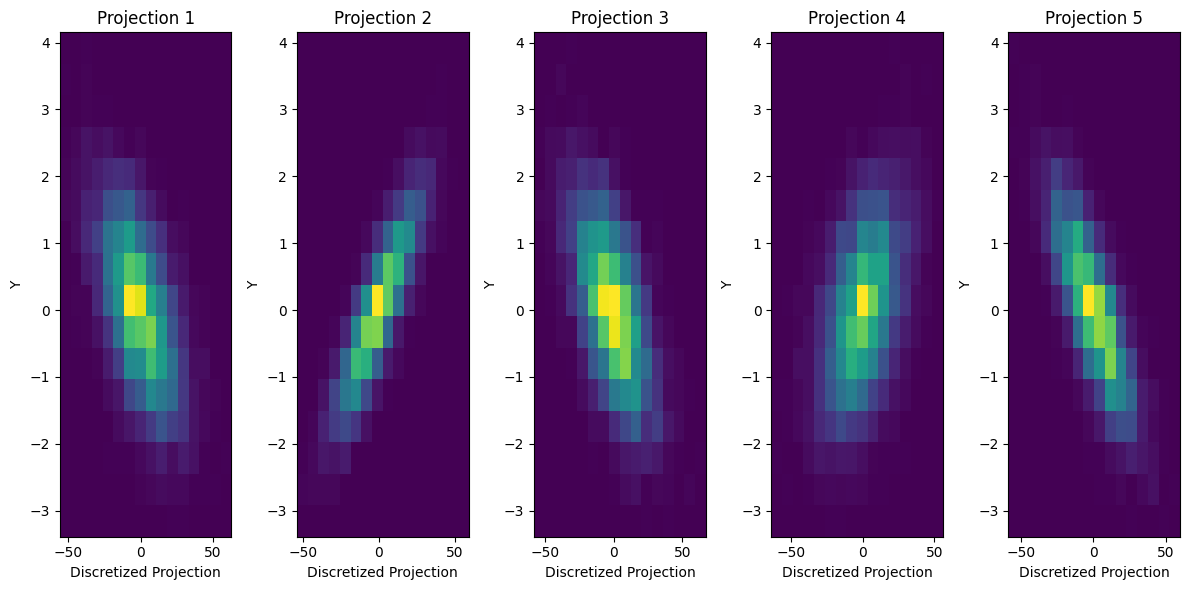

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def discretized_random_projection(data, n_projections, grid_size):
    # Generate random projection vectors
    projections = np.random.randn(n_projections, 3)
    projections /= np.linalg.norm(projections, axis=1)[:, np.newaxis]

    # Project data
    projected = np.dot(data, projections.T)

    # Discretize
    discretized = np.floor(projected * grid_size).astype(int)

    return discretized

# Example usage
data = np.random.randn(4000, 3)  # Generate some random 2D data
grid_size = 16
n_projections = 5

discretized = discretized_random_projection(data, n_projections, grid_size)

# Visualize
fig, axes = plt.subplots(1, n_projections, figsize=(12, 6))
for i in range(n_projections):
    axes[i].hist2d(discretized[:, i], data[:, 1], bins=(grid_size, grid_size))
    axes[i].set_title(f'Projection {i+1}')
    axes[i].set_xlabel('Discretized Projection')
    axes[i].set_ylabel('Y')

plt.tight_layout()
plt.show()